In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Members:

1. Chua Pei Jun

2. Liew Choy Yein

3. Yeoh Hao Jing

# **Program Scenario:**
You're running a bakery and want to manage your inventory and handle customer orders efficiently. To achieve this, you've developed a C++ program that allows you to add bakery items, display them to customers, take orders, generate receipts, and manage inventory.

# **Program Requirements:**
1. Ability to add new bakery items (cookies or cakes) with their respective names and prices.

2. Display the available bakery items to customers, categorized as cookies and cakes.

3. Allow customers to choose items, specify quantities, and generate a receipt.

4. Apply discounts based on the total price of the order.

5. Store orders in a file for reference and clearing after processing.

# **Problem Statement:**
The program aims to streamline bakery operations by providing functionalities for both administrators (adding items, managing inventory) and customers (placing orders, generating receipts). Object-oriented programming principles are employed to model bakery items as objects, encapsulate their properties and behaviors, and manage interactions between the bakery shop and its customers.

# **Problem Analysis:**
Inputs:
- For the admin menu:
  - Login (username, password).
  - Choice of action (add item, display items).
  - Details of the bakery item to add (type, name, price).
- For the customer menu:
  - Choice of bakery item to order.
  - Quantity of items to order.

Outputs:
- Display of bakery items with their names and prices.
- Receipts showing ordered items, quantities, prices, discounts, and total prices.
- Confirmation messages for successful operations (e.g., item added, order placed).
- Error messages for invalid inputs or failed operations.

Processes:
- Admin Menu:
  - Adding new bakery items by providing type, name, and price.
  - Displaying existing bakery items.
- Customer Menu:
  - Selecting bakery items to order.
  - Specifying the quantity of each selected item.
  - Writing orders to an "order.txt" file.
  - Generating receipts based on orders.
  - Applying discounts based on total order price.

Constraints:
- Maximum number of bakery items that can be stored (MAX_ITEMS).
- File handling limitations (e.g., unable to open or write to files).
- Input validation to ensure correct data entry (e.g., valid item types, positive prices and quantities).
- Discount thresholds and rates (e.g., 5% for orders over RM100, 10% for orders over RM200).

Assumptions:
- The program assumes that the "bakery_items.txt" file exists and contains initial bakery items data.
- It assumes a predefined format for input and output files (e.g., space-separated values for item details).
- Discounts are applied based on the total price before tax and any other additional charges.

# **How to Run the Program:**

1. Run all the code cells except code cells for test cases.

2. Ensure that "bakery_items.txt" exists and contains initial bakery items data.

3. Choose between the admin and customer menus.
   - Admin login credential:
       - **username: admin**
       - **password: 123**
   - Admin Menu: Add items, display items
   - Customer Menu: Browse items, place orders, generate receipts.

4. Follow the prompts to perform desired actions.

5. Exit the program when finished.

# UML Diagram 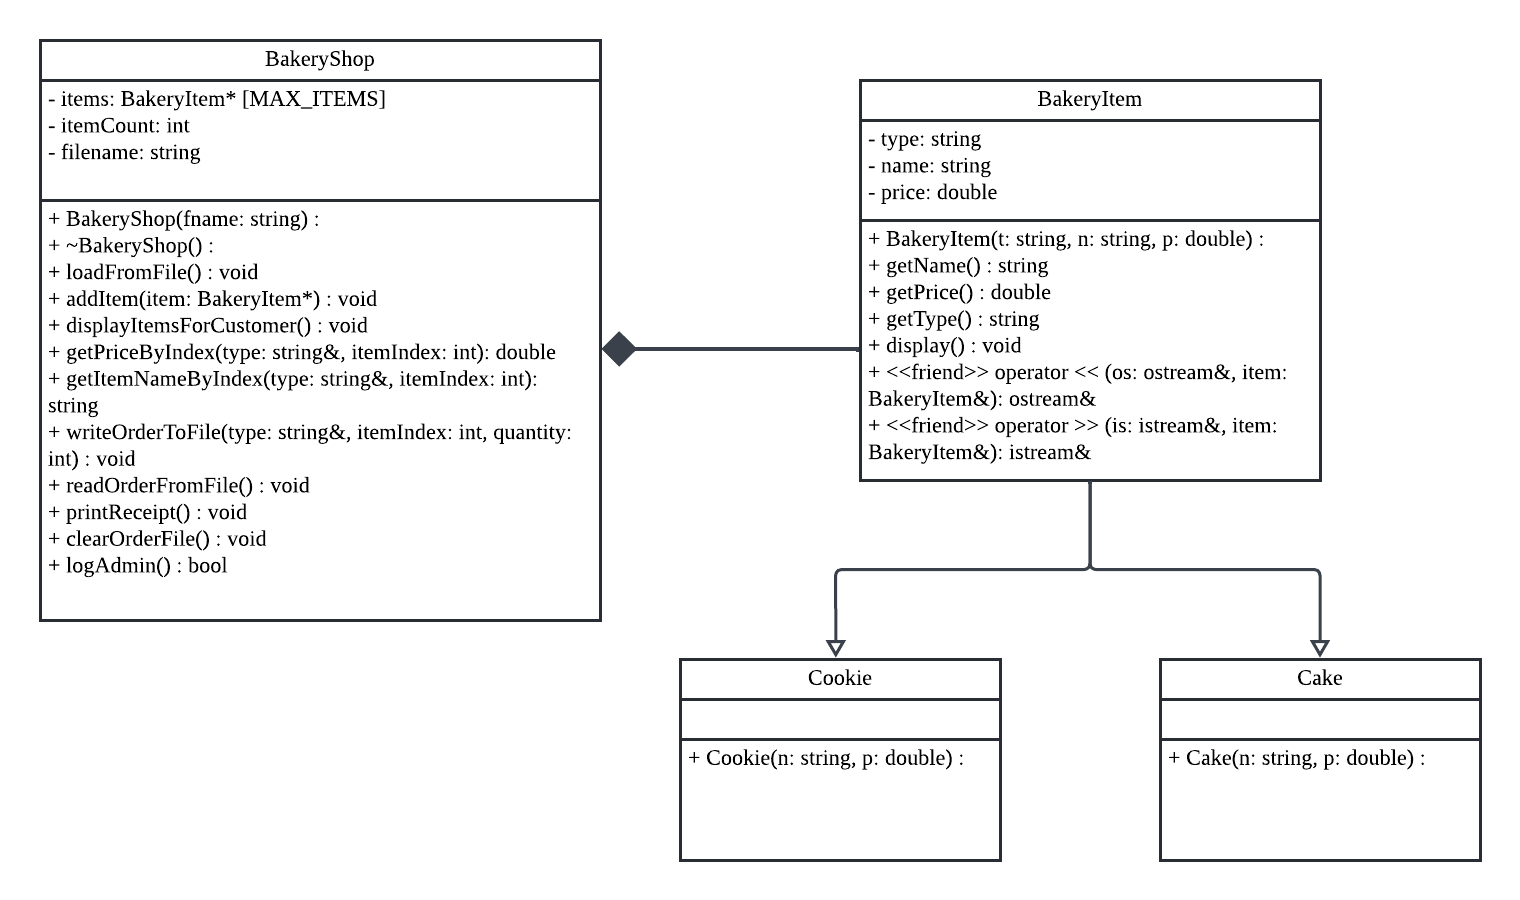

Another test file "bakery_items.txt" for test case:

In [ ]:
%%writefile bakery_items.txt
Cookie SnickerdoodleCookie 1.60
Cake BlackForestCake 24.00
Cake PineappleUpsideDownCake 21.00
Cookie WhiteChocolateMacadamiaCookie 2.30
Cake VanillaBeanCake 23.00
Cake CoconutCake 22.00
Cookie DoubleChocolateCookie 1.85
Cookie GingerbreadCookie 2.10
Cake StrawberryShortCake 20.50
Cookie CranberryOrangeCookie 2.20
Cookie SugarCookie 1.40
Cake TiramisuCake 26.00
Cake BlueberryCheeseCake 22.00
Cookie MolassesCookie 1.80
Cake MatchaCake 24.50
Cake MarbleCake 21.50
Cookie ChocolateMintCookie 2.05
Cookie ShortbreadCookie 1.90
Cake OrangePoppySeedCake 19.00
Cookie LemonZestCookie 2.15
Cake RaspberryChocolateCake 25.50

Writing bakery_items.txt


Input file "bakery_items.txt" :

In [ ]:
%%writefile bakery_items.txt
Cookie ChocolateChipCookie 1.50
Cake RedVelvetCake 20.00
Cake BananaCake 18.00
Cookie AlmondCookie 2.00
Cake CarrotCake 22.50
Cake ChocolateCake 25.00
Cookie OatmealCookie 1.75
Cookie PeanutButterCookie 1.95
Cake LemonCake 19.50
Cookie MacadamiaNutCookie 2.25

Writing bakery_items.txt


Header file "bakery.h":

In [ ]:
%%writefile bakery.h

#ifndef BAKERY_H
#define BAKERY_H

#include <iostream>
#include <fstream>
#include <iomanip>
#include <string>
using namespace std;

// Constants
static const int MAX_ITEMS = 100; // Maximum number of items in the bakery

// Base class for bakery items
class BakeryItem {
private:
    string type; // Type of the bakery item (e.g., Cookie, Cake)
    string name; // Name of the bakery item
    double price; // Price of the bakery item

public:
    // Constructor
    BakeryItem(string t, string n, double p);

    // Getter for item name
    string getName() const;

    // Getter for item price
    double getPrice() const;

    // Getter for item type
    string getType() const;

    // Display item details
    void display() const;

    // Overloading << operator for output
    friend ostream& operator<<(ostream& os, const BakeryItem& item);

    // Overloading >> operator for input
    friend istream& operator>>(istream& is, BakeryItem& item);

};

// Derived class for cookies
class Cookie : public BakeryItem {
public:
    // Constructor
    Cookie(string n, double p);
};

// Derived class for cakes
class Cake : public BakeryItem {
public:
    // Constructor
    Cake(string n, double p);
};

// Bakery shop class to manage items and orders
class BakeryShop {
private:
    int itemCount; // Number of items in the shop
    string filename; // File name to store items
    BakeryItem* items[MAX_ITEMS]; // Array of pointers to bakery items
public:
    // Constructor
    BakeryShop(string fname);

    // Destructor
    ~BakeryShop();

    // Load bakery items from file
    void loadFromFile();

    // Add new items to the bakery and save to file
    void addItem(BakeryItem* item);

    // Display items and prices for customers
    void displayItemsForCustomer() const;

    // Get item price by index for a given type
    double getPriceByIndex(const string& type, int itemIndex) const;

    // Get item name by index for a given type
    string getItemNameByIndex(const string& type, int itemIndex) const;

    // Write order details to "order.txt" file
    void writeOrderToFile(const string& type, int itemIndex, int quantity) const;

    // Read order details from "order.txt" file
    void readOrderFromFile() const;

    // Calculate prices and print receipt
    void printReceipt() const;

    // Clear "order.txt" file
    void clearOrderFile() const;

    // Admin Login
    bool logAdmin();

};

#endif

Writing bakery.h


Implementation file "bakery.cpp":

In [ ]:
%%writefile bakery.cpp

#include "bakery.h"

// Implementation of BakeryItem methods
BakeryItem::BakeryItem(string t, string n, double p) {type=t; name=n; price=p;}

// Getter for item name
string BakeryItem::getName() const {
    return name;
}

// Getter for item price
double BakeryItem::getPrice() const {
    return price;
}

// Getter for item type
string BakeryItem::getType() const {
    return type;
}

// Display item details
void BakeryItem::display() const {
    cout << name << ", Price per piece: RM" << price << endl;
}

// Overloading << operator for output
ostream& operator<<(ostream& os, const BakeryItem& item) {
    os << item.type << " " << item.name << " " << item.price;
    return os;
}

// Overloading >> operator for input
istream& operator>>(istream& is, BakeryItem& item) {
    is >> item.type >> item.name >> item.price;
    return is;
}

// Implementation of Cookie methods
Cookie::Cookie(string n, double p) : BakeryItem("Cookie", n, p) {}

// Implementation of Cake methods
Cake::Cake(string n, double p) : BakeryItem("Cake", n, p) {}

// Implementation of BakeryShop methods
BakeryShop::BakeryShop(string fname) {itemCount=0; filename=fname;}

// Destructor for BakeryShop to clean up dynamically allocated memory
BakeryShop::~BakeryShop() {
    for (int i = 0; i < itemCount; ++i) {
        delete items[i];
    }
}

// Load bakery items from file
void BakeryShop::loadFromFile() {
    ifstream file(filename);
    if (file.is_open()) {
        BakeryItem item("", "", 0.0); // Temporary item for reading from file
        while (file >> item) { // Read file with overloaded >> operator
            if (itemCount < MAX_ITEMS) {
                if (item.getType() == "Cookie") {
                    items[itemCount++] = new Cookie(item.getName(), item.getPrice()); // Add Cookie item
                } else if (item.getType() == "Cake") {
                    items[itemCount++] = new Cake(item.getName(), item.getPrice()); // Add Cake item
                } else {
                    cout << "Unknown item type found in file: " << item.getType() << endl;
                }
            } else {
                cout << "Cannot add more items. Shop is full." << endl;
                break;
            }
        }
        file.close();
        cout << "Items loaded from " << filename << endl;
    } else {
        cout << "Unable to open file." << endl;
    }
}

// Add new items to the bakery and save to file
void BakeryShop::addItem(BakeryItem* item) {
    if (itemCount < MAX_ITEMS) {
        items[itemCount++] = item;
    } else {
        cout << "Cannot add more items. Shop is full." << endl;
    }
    ofstream file(filename);
    if (file.is_open()) {
        for (int i = 0; i < itemCount; ++i) {
            file << *items[i] << endl; // Save items to file using overloaded << operator
        }
        file.close();
        cout << "Items saved to " << filename << endl;
    } else {
        cout << "Unable to open file." << endl;
    }
}

// Display items and prices for customers
void BakeryShop::displayItemsForCustomer() const {
    cout << "\n🍪Cookie:" << endl;
    int cookieIndex = 1;
    for (int i = 0; i < itemCount; ++i) {
        if (items[i]->getType() == "Cookie") {
            cout << cookieIndex << ". ";
            items[i]->display();
            cookieIndex++;
        }
    }

    cout << "\n🍰Cake:" << endl;
    int cakeIndex = 1;
    for (int i = 0; i < itemCount; ++i) {
        if (items[i]->getType() == "Cake") {
            cout << cakeIndex << ". ";
            items[i]->display();
            cakeIndex++;
        }
    }
}

// Get item price by index for a given type
double BakeryShop::getPriceByIndex(const string& type, int itemIndex) const {
    int count = 0;
    for (int i = 0; i < itemCount; ++i) {
        if (items[i]->getType() == type) {
            count++;
            if (count == itemIndex) {
                return items[i]->getPrice();
            }
        }
    }
    return 0.0; // Return 0 if item not found
}

// Get item name by index for a given type
string BakeryShop::getItemNameByIndex(const string& type, int itemIndex) const {
    int count = 0;
    for (int i = 0; i < itemCount; ++i) {
        if (items[i]->getType() == type) {
            count++;
            if (count == itemIndex) {
                return items[i]->getName();
            }
        }
    }
    return ""; // Return empty string if item not found
}

// Write order details to "order.txt" file
void BakeryShop::writeOrderToFile(const string& type, int itemIndex, int quantity) const {
    ofstream file("order.txt", ios::app); // Open file in append mode
    if (file.is_open()) {
        string itemName = getItemNameByIndex(type, itemIndex);
        if (itemName != "") {
            double price = getPriceByIndex(type, itemIndex);
            file << type << " " << itemName << " " << price << " " << quantity << endl;
            cout << "Order added to cart successfully." << endl;
        } else {
            cout << "Invalid item index." << endl;
        }
        file.close();
    } else {
        cout << "Unable to add to cart." << endl;
    }
}

// Read order details from "order.txt" file
void BakeryShop::readOrderFromFile() const {
    ifstream file("order.txt");
    if (!file.is_open()) {
        cout << "Unable to open file order.txt" << endl;
        return;
    }

    cout << "\nOrder Details:\n";

    string type, name;
    double price;
    int quantity;
    while (file >> type >> name >> price >> quantity) {
        cout << "Type: " << type << ", Name: " << name << ", Price: RM" << price << ", Quantity: " << quantity << endl;
    }

    file.close();
}

// Calculate prices and print receipt
void BakeryShop::printReceipt() const {
    ifstream file("order.txt");
    if (!file.is_open()) {
        cout << "Unable to open order file." << endl;
        return;
    }

    double totalPrice = 0.0;
    double discount = 0.0;

    cout << "\nReceipt:\n";
    cout << "-------------------------------------------------------------------\n";
    cout << left << setw(11) << "Item Type" << setw(32) << "Item Name" << setw(8) << "Price" << setw(10) << "Quantity" << setw(8) << "Total\n" << endl;
    cout << "-------------------------------------------------------------------\n";

    string type, name;
    double price;
    int quantity;
    while (file >> type >> name >> price >> quantity) {
        double itemTotal = price * quantity;
        totalPrice += itemTotal;
        cout << left << setw(11) << type << setw(32) << name << setw(8) << price << setw(10) << quantity << setw(8) << itemTotal << endl;
    }
    cout << "-------------------------------------------------------------------\n";
    cout << "Total price of all items: RM" << totalPrice << endl;

    if (totalPrice >= 200.0) {
        discount = totalPrice * 0.10; // 10% discount for total purchase amount >= RM200
        cout << "Discount: -RM" << discount << "\t\t(10% discount for min spend RM200)" << endl;
    } else if (totalPrice >= 100.0) {
        discount = totalPrice * 0.05; // 5% discount for total purchase amount >= RM100
        cout << "Discount: -RM" << discount << "\t\t(5% discount for min spend RM100)" << endl;
    } else {
        cout << "Discount: -RM" << discount << endl;
    }
    cout << "Total price after discount: RM" << (totalPrice - discount) << endl;
    cout << "-------------------------------------------------------------------\n";

    file.close();
}

// Clear "order.txt" file
void BakeryShop::clearOrderFile() const {
    ofstream file("order.txt", ofstream::out | ofstream::trunc); // Open file in truncation mode to delete existing content in the file when file is opened
    if (file.is_open()) {
        file.close();
        cout << "Order cleared successfully." << endl;
    } else {
        cout << "Unable to clear order." << endl; // Unable to open file order.txt for clearing
    }
}


// Admin Login
bool BakeryShop::logAdmin() {
    string username, password;
    const string ADMIN_USERNAME = "admin";
    const string ADMIN_PASSWORD = "123";
    cout << "\n--------------------------------\n";
    cout << "            Admin Login               \n";
    cout << "--------------------------------\n";
    cout << "Enter admin username: ";
    cin >> username;
    cout << "Enter admin password: ";
    cin >> password;

    if (username == ADMIN_USERNAME && password == ADMIN_PASSWORD) {
        return true;
    } else {
        cout << "Invalid username or password." << endl;
        return false;
    }
}

Writing bakery.cpp


Main file "main.cpp":

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <iomanip>
#include "bakery.h"

using namespace std;

int main() {
    string filename = "bakery_items.txt";
    BakeryShop shop(filename);
    shop.loadFromFile(); // Load existing bakery items from file
    shop.clearOrderFile(); // Ensure the order list is empty at the start
    cout << fixed << setprecision(2); // Set output formatting for prices
    char choice;

    // Main menu loop
    do {
        cout << "\n\033[1mWelcome to Eid's Bakery🍞\033[0m";
        cout << "\nMenu:\n1. Admin\n2. Customer\n3. Exit\nEnter your choice: ";
        cin >> choice;

        switch (choice) {
            case '1': {
               // Admin login
                if (shop.logAdmin()) {
                  // Admin menu
                  char adminChoice;
                  do {
                      cout << "\nAdmin Menu:\n1. Add Item\n2. Display Items\n3. Exit\nEnter your choice: ";
                      cin >> adminChoice;

                      switch (adminChoice) {
                          case '1': {
                              // Add a new item to the bakery
                              string type, name;
                              double price;
                              cout << "Enter type of item (Cookie/Cake): ";
                              cin >> type;
                              cout << "Enter name of item: ";
                              cin.ignore(); // Clear the newline character from the input buffer
                              getline(cin, name);
                              cout << "Enter price of item: RM";
                              do{
                                cin >> price;
                                if(price<=0){
                                  cout << "Price must be a positive number. Please try again." << endl;  // Ensure user input positive price
                                  continue;
                                }
                              }while(price <= 0);
                              if (type == "Cookie") {
                                  shop.addItem(new Cookie(name, price)); // Add a new Cookie item
                              } else if (type == "Cake") {
                                  shop.addItem(new Cake(name, price)); // Add a new Cake item
                              } else {
                                  cout << "Invalid type." << endl;
                              }
                              break;
                          }
                          case '2':
                              // Display all items for admin to review
                              shop.displayItemsForCustomer();
                              break;
                          case '3':
                              // Exit the admin menu
                              cout << "Exiting admin menu..." << endl;
                              break;
                          default:
                              cout << "Invalid choice." << endl;
                      }
                  } while (adminChoice != '3');
                }
                break;
            }
            case '2': {
                // Customer menu
                char itemChoice;
                bool displayMenu = true;
                int itemType, itemIndex, quantity;
                double totalPrice = 0.0;

                // Display the bakery items menu for customers
                cout << "\n--------------------------------\n";
                cout << "             Menu               \n";
                cout << "--------------------------------";
                shop.displayItemsForCustomer();

                do {
                    if (displayMenu) {
                        cout << "\nChoose 1 for Cookie or 2 for Cake | Enter 'q' to quit: ";
                    } else {
                        // Prompt for order actions
                        cout << "\nChoose 1 for Cookie or 2 for Cake | Enter 'c' to confirm purchase | Enter 'q' to quit: ";
                    }
                    cin >> itemChoice;

                    if (itemChoice == '1' || itemChoice == '2') {
                        // Process item selection
                        displayMenu = false;
                        itemType = itemChoice - '0'; // Convert char to int
                        cout << "Enter the index of the item you want to purchase: ";
                        cin >> itemIndex;
                        cout << "Enter the quantity: ";
                        do{
                          cin >> quantity;
                          if(quantity<=0){
                            cout << "Quantity must be a positive number. Please try again." << endl;  // Ensure user input positive quantity
                            continue;
                          }
                        }while(quantity<=0); // Ensure user input positive quantity

                        // Write order details to file
                        shop.writeOrderToFile((itemType == 1) ? "Cookie" : "Cake", itemIndex, quantity);
                        cout << endl;

                        // Read and display current order
                        shop.readOrderFromFile();
                    } else if (itemChoice == 'c') {
                        // Confirm and print the receipt
                        shop.printReceipt();
                        cout << endl;
                        cout << "Thank you for ordering! Your order is being prepared now!" << endl;
                        do{
                          cout << "Press 0 to continue...  ";
                          cin >> itemChoice;
                          if(itemChoice != '0'){
                            cout << "Invalid choice." << endl;  // Ensure user input '0'
                            continue;
                          }
                        }while(itemChoice != '0');
                        if (itemChoice == '0') {
                            shop.clearOrderFile(); // Clear order file after confirmation
                        }
                        break;
                    } else if (itemChoice == 'q') {
                        // Quit the customer menu
                        shop.clearOrderFile(); // Clear order file on exit
                        cout << "Exiting customer menu..." << endl;
                        break;
                    } else {
                        cout << "Invalid choice." << endl;
                        displayMenu = true;
                    }
                } while (true);
                break;
            }
            case '3':
                // Exit the application
                cout << "\n\033[1m❤Thank you for your visiting❤\033[0m" << endl;
                break;
            default:
                cout << "Invalid choice." << endl;
        }
    } while (choice != '3');

    return 0; // End of the program
}

Writing main.cpp


Sample of program runs:

# **Test Case 1 - Admin Page**

In [ ]:
!g++ main.cpp bakery.cpp bakery.h -o output.a
!./output.a

Items loaded from bakery_items.txt
Order cleared successfully.

Welcome to Eid's Bakery🍞
Menu:
1. Admin
2. Customer
3. Exit
Enter your choice: 1

--------------------------------
            Admin Login               
--------------------------------
Enter admin username: admin
Enter admin password: 123

Admin Menu:
1. Add Item
2. Display Items
3. Exit
Enter your choice: 2

🍪Cookie:
1. ChocolateChipCookie, Price per piece: RM1.50
2. AlmondCookie, Price per piece: RM2.00
3. OatmealCookie, Price per piece: RM1.75
4. PeanutButterCookie, Price per piece: RM1.95
5. MacadamiaNutCookie, Price per piece: RM2.25

🍰Cake:
1. RedVelvetCake, Price per piece: RM20.00
2. BananaCake, Price per piece: RM18.00
3. CarrotCake, Price per piece: RM22.50
4. ChocolateCake, Price per piece: RM25.00
5. LemonCake, Price per piece: RM19.50

Admin Menu:
1. Add Item
2. Display Items
3. Exit
Enter your choice: 1
Enter type of item (Cookie/Cake): Cake
Enter name of item: Walnut
Enter price of item: RM14
Items saved t

# **Test Case 2 - Customer Page**

In [ ]:
!g++ main.cpp bakery.cpp bakery.h -o output.a
!./output.a

Items loaded from bakery_items.txt
Order cleared successfully.

Welcome to Eid's Bakery🍞
Menu:
1. Admin
2. Customer
3. Exit
Enter your choice: 2

--------------------------------
             Menu               
--------------------------------
🍪Cookie:
1. ChocolateChipCookie, Price per piece: RM1.50
2. AlmondCookie, Price per piece: RM2.00
3. OatmealCookie, Price per piece: RM1.75
4. PeanutButterCookie, Price per piece: RM1.95
5. MacadamiaNutCookie, Price per piece: RM2.25

🍰Cake:
1. RedVelvetCake, Price per piece: RM20.00
2. BananaCake, Price per piece: RM18.00
3. CarrotCake, Price per piece: RM22.50
4. ChocolateCake, Price per piece: RM25.00
5. LemonCake, Price per piece: RM19.50
6. Walnut, Price per piece: RM14.00

Choose 1 for Cookie or 2 for Cake | Enter 'q' to quit: 1
Enter the index of the item you want to purchase: 2
Enter the quantity: 2
Order added to cart successfully.


Order Details:
Type: Cookie, Name: AlmondCookie, Price: RM2.00, Quantity: 2

Choose 1 for Cookie or 2 fo

# **Test Case 3 - Input Validation**

In [ ]:
!g++ main.cpp bakery.cpp bakery.h -o output.a
!./output.a

Items loaded from bakery_items.txt
Order cleared successfully.

Welcome to Eid's Bakery🍞
Menu:
1. Admin
2. Customer
3. Exit
Enter your choice: 4
Invalid choice.

Welcome to Eid's Bakery🍞
Menu:
1. Admin
2. Customer
3. Exit
Enter your choice: 1

--------------------------------
            Admin Login               
--------------------------------
Enter admin username: abc
Enter admin password: 123
Invalid username or password.

Welcome to Eid's Bakery🍞
Menu:
1. Admin
2. Customer
3. Exit
Enter your choice: 1

--------------------------------
            Admin Login               
--------------------------------
Enter admin username: admin
Enter admin password: 123

Admin Menu:
1. Add Item
2. Display Items
3. Exit
Enter your choice: 1
Enter type of item (Cookie/Cake): Bread
Enter name of item: Walnut
Enter price of item: RM5
Invalid type.

Admin Menu:
1. Add Item
2. Display Items
3. Exit
Enter your choice: 1
Enter type of item (Cookie/Cake): Cake
Enter name of item: Walnut
Enter price o

# **Test Case 4 - Another test file**

In [ ]:
!g++ main.cpp bakery.cpp bakery.h -o output.a
!./output.a

Items loaded from bakery_items.txt
Order cleared successfully.

Welcome to Eid's Bakery🍞
Menu:
1. Admin
2. Customer
3. Exit
Enter your choice: 2

--------------------------------
             Menu               
--------------------------------
🍪Cookie:
1. SnickerdoodleCookie, Price per piece: RM1.60
2. WhiteChocolateMacadamiaCookie, Price per piece: RM2.30
3. DoubleChocolateCookie, Price per piece: RM1.85
4. GingerbreadCookie, Price per piece: RM2.10
5. CranberryOrangeCookie, Price per piece: RM2.20
6. SugarCookie, Price per piece: RM1.40
7. MolassesCookie, Price per piece: RM1.80
8. ChocolateMintCookie, Price per piece: RM2.05
9. ShortbreadCookie, Price per piece: RM1.90
10. LemonZestCookie, Price per piece: RM2.15

🍰Cake:
1. BlackForestCake, Price per piece: RM24.00
2. PineappleUpsideDownCake, Price per piece: RM21.00
3. VanillaBeanCake, Price per piece: RM23.00
4. CoconutCake, Price per piece: RM22.00
5. StrawberryShortCake, Price per piece: RM20.50
6. TiramisuCake, Price per piece